In [58]:
# using json files plot findings using plotly
# Most popular channels, bar graph of channels sorted by number of videos
# Box plot for view count of each root path
# do some language processing and graph rate of words / phrases
# date range of uploads
# average likes for each root path
# average repeats for each root path

"""
The rapid and expansive growth of YouTube over the years has caused worry among creators and viewers alike that traction towards smaller channels 
has dwindled while large channels and businesses are pushed to the feed more often. I want to answer the following questions:

 - What defines a “large” channel vs. a “small” channel? 
    - views, subscribers, likes, comments
 - How often does YouTube recommend a small channel / video? 
    - define a range for large vs small
 - On average, what does YouTube usually recommend to users? 
    - Find the most common videos / categories throught all rootsf
 - Does YouTube have a bias towards larger creators and businesses? 
 - Does YouTube have a bias towards certain content categories? 

The purpose of this report is to analyze data gathered from YouTube and evaluate whether or not 
there is a bias within YouTube's recommendation algorithm and suggest methods to alleviate any biases.

What data do I have and what data is useful for answering these questions?
"""

"\nThe rapid and expansive growth of YouTube over the years has caused worry among creators and viewers alike that traction towards smaller channels \nhas dwindled while large channels and businesses are pushed to the feed more often. I want to answer the following questions:\n\n - What defines a “large” channel vs. a “small” channel? \n    - views, subscribers, likes, comments\n - How often does YouTube recommend a small channel / video? \n    - define a range for large vs small\n - On average, what does YouTube usually recommend to users? \n    - Find the most common videos / categories throught all rootsf\n - Does YouTube have a bias towards larger creators and businesses? \n - Does YouTube have a bias towards certain content categories? \n\nThe purpose of this report is to analyze data gathered from YouTube and evaluate whether or not \nthere is a bias within YouTube's recommendation algorithm and suggest methods to alleviate any biases.\n\nWhat data do I have and what data is usef

In [59]:
import json
import os
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd

In [60]:
rootVideos = os.listdir(f"api_data/maxDepth-1000")
dataframes = {}
for root in rootVideos:
    try:
        with open(f"api_data/maxDepth-1000/{root}/videos.json", "r") as f:
            videoData = json.load(f)
            customData = {}
            for ID in videoData:
                customData[ID] = {
                    "root": root,
                    "seenCount": videoData[ID]["seenCount"],
                    "depths": videoData[ID]["depths"],

                    "publishedAt": videoData[ID]["items"][0]["snippet"]["publishedAt"],
                    "title": videoData[ID]["items"][0]["snippet"]["title"],
                    "description": videoData[ID]["items"][0]["snippet"]["description"],
                    "channelId": videoData[ID]["items"][0]["snippet"]["channelId"],
                    "channelTitle": videoData[ID]["items"][0]["snippet"]["channelTitle"],
                    "tags": videoData[ID]["items"][0]["snippet"]["tags"],
                    "categoryId": videoData[ID]["items"][0]["snippet"]["categoryId"],

                    "viewCount": videoData[ID]["items"][0]["statistics"]["viewCount"],
                    "likeCount": videoData[ID]["items"][0]["statistics"]["likeCount"],
                    "commentCount": videoData[ID]["items"][0]["statistics"]["commentCount"],

                    "defaultLanguage": videoData[ID]["items"][0]["snippet"]["defaultLanguage"],
                    "defaultAudioLanguage": videoData[ID]["items"][0]["snippet"]["defaultAudioLanguage"],

                    "licensedContent": videoData[ID]["items"][0]["contentDetails"]["licensedContent"],
                    "regionRestriction": videoData[ID]["items"][0]["contentDetails"]["regionRestriction"],
                    "contentRating": videoData[ID]["items"][0]["contentDetails"]["contentRating"],
                    "madeForKids": videoData[ID]["items"][0]["status"]["madeForKids"],
                    "selfDeclaredMadeForKids": videoData[ID]["items"][0]["status"]["selfDeclaredMadeForKids"]
                }
            dataframes[root] = pd.DataFrame(data=customData).T
    except FileNotFoundError:
        ""


In [61]:
dataframes["0gegrmZYCPU"].head()

root seenCount  \
0gegrmZYCPU  0gegrmZYCPU         2   
k9BbypWPjx0  0gegrmZYCPU         3   
Y1J9_9-vNcU  0gegrmZYCPU       107   
-nOdSj0u29U  0gegrmZYCPU       100   
wY6UyatwVTA  0gegrmZYCPU         7   

                                                        depths  \
0gegrmZYCPU                                           [0, 228]   
k9BbypWPjx0                                       [1, 65, 229]   
Y1J9_9-vNcU  [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 2...   
-nOdSj0u29U  [3, 7, 9, 11, 13, 17, 19, 21, 23, 25, 27, 29, ...   
wY6UyatwVTA                     [5, 15, 63, 99, 113, 173, 215]   

                      publishedAt  \
0gegrmZYCPU  2024-07-10T18:51:33Z   
k9BbypWPjx0  2024-05-09T07:00:19Z   
Y1J9_9-vNcU  2021-08-16T18:46:09Z   
-nOdSj0u29U  2021-09-06T16:35:29Z   
wY6UyatwVTA  2021-01-19T08:21:09Z   

                                                         title  \
0gegrmZYCPU  Gus Atkinson Takes 7-45 on Debut | Highlights ...   
k9BbypWPjx0  💥🦆 Both Openers Removed for Ducks! | Superb Fi...   
Y1J9_9-vNcU  India Claim Thrilling Win! | England v India -...   
-nOdSj0u29U  India Win To Take 2-1 Lead | England v India -...   
wY6UyatwVTA  India claim stunning series win, end Australia...   

                                                   description  \
0gegrmZYCPU  Go to ecb.co.uk to join We Are England Cricket...   
k9BbypWPjx0  Watch the first two overs in full as Bumrah & ...   
Y1J9_9-vNcU  Go to ecb.co.uk to join We Are England Cricket...   
-nOdSj0u29U  Go to ecb.co.uk to join We Are England Cricket...   
wY6UyatwVTA  Rishabh Pant was the hero as an injury-ravaged...   

                            channelId                   channelTitle  \
0gegrmZYCPU  UCz1D0n02BR3t51KuBOPmfTQ  England & Wales Cricket Board   
k9BbypWPjx0  UC4dzcboWxiDQokrppUz0ZhA          Lord's Cricket Ground   
Y1J9_9-vNcU  UCz1D0n02BR3t51KuBOPmfTQ  England & Wales Cricket Board   
-nOdSj0u29U  UCz1D0n02BR3t51KuBOPmfTQ  England & Wales Cricket Board   
wY6UyatwVTA  UCkBY0aHJP9BwjZLDYxAQrKg                 cricket.com.au   

                                                          tags categoryId  \
0gegrmZYCPU  [cricket videos, highlights, cricket, england ...         17   
k9BbypWPjx0  [Lord's, Lord's Cricket Ground, Cricket, Engla...         17   
Y1J9_9-vNcU  [England, England vs. India, India, cricket, e...         17   
-nOdSj0u29U  [England, England vs. India, India, england cr...         17   
wY6UyatwVTA  [Australia, India, day five, fourth Test, Gabb...         17   

            viewCount likeCount commentCount defaultLanguage  \
0gegrmZYCPU   1739266     34977         1217            None   
k9BbypWPjx0   2612038     28461          593            None   
Y1J9_9-vNcU  51939703    980726        43929            None   
-nOdSj0u29U  29518677    522922        28689            None   
wY6UyatwVTA  79153297   1237743        61247            None   

            defaultAudioLanguage licensedContent  \
0gegrmZYCPU                en-GB            True   
k9BbypWPjx0                en-GB            True   
Y1J9_9-vNcU                en-GB            True   
-nOdSj0u29U                en-GB            True   
wY6UyatwVTA                 None            True   

                                regionRestriction contentRating madeForKids  \
0gegrmZYCPU  {'allowed': None, 'blocked': ['NZ']}            {}       False   
k9BbypWPjx0                                  None            {}       False   
Y1J9_9-vNcU  {'allowed': None, 'blocked': ['NZ']}            {}       False   
-nOdSj0u29U  {'allowed': None, 'blocked': ['NZ']}            {}       False   
wY6UyatwVTA                                  None            {}       False   

            selfDeclaredMadeForKids  
0gegrmZYCPU                    None  
k9BbypWPjx0                    None  
Y1J9_9-vNcU                    None  
-nOdSj0u29U                    None  
wY6UyatwVTA                    None

In [62]:
# Box plots of view counts for each root
fig = go.Figure()
for root in dataframes:
    fig.add_box(x=dataframes[root]['root'], y=dataframes[root]['viewCount'])

fig.update_layout(
    title="Box Plots of views for each root",
    xaxis_title="Video Root ID",
    yaxis_title="Number of views",
    legend_title="Legend",
    yaxis_range=[0,10000000]
)
fig.show()

In [63]:
# Box plot of total view counts
fig = go.Figure()
views = []
for root in dataframes:
    views[len(views):] = list(dataframes[root]['viewCount'])
fig.add_box(y=views)
fig.update_layout(
    title="Box Plot of views for total video views",
    yaxis_title="Number of views",
    yaxis_range=[0,10000000]
)
fig.show()


In [64]:
# views: dict[{ID}]["items"][0]["statistics"]["viewCount"]
fig = go.Figure()

rootVideos = os.listdir(f"api_data/maxDepth-1000")
for root in rootVideos:
    try:
        with open(f"api_data/maxDepth-1000/{root}/videos.json", "r") as f:
            videoData = json.load(f)
    except FileNotFoundError:
        ""
    views = []
    for ID in videoData:
        views.append(videoData[ID]["items"][0]["statistics"]["viewCount"])


    fig.add_trace(go.Box(y=views,name=root))

fig.update_layout(
    title="Box Plots of views for each root",
    xaxis_title="Video Root ID",
    yaxis_title="Number of views",
    legend_title="Legend",
    yaxis_range=[0,10000000]
)

fig.show()

In [65]:
fig = go.Figure()

rootVideos = os.listdir(f"api_data/maxDepth-1000")
views = []
for root in rootVideos:
    try:
        with open(f"api_data/maxDepth-1000/{root}/videos.json", "r") as f:
            videoData = json.load(f)
    except FileNotFoundError:
        ""
    for ID in videoData:
        views.append(videoData[ID]["items"][0]["statistics"]["viewCount"])

fig.add_trace(go.Box(y=views))

fig.update_layout(
    title="Box Plot of views for total video views",
    yaxis_title="Number of views",
    yaxis_range=[0,10000000]
)

fig.show()

In [66]:
fig = go.Figure()

rootVideos = os.listdir(f"api_data/maxDepth-1000")
for root in rootVideos:
    try:
        with open(f"api_data/maxDepth-1000/{root}/videos.json", "r") as f:
            videoData = json.load(f)
    except FileNotFoundError:
        ""
    views = [None] * 1000 # create array of size 1000
    depths = [None] * 1000 # create array of size 1000
    for ID in videoData:
        for depth in videoData[ID]["depths"]:
            depths[depth] = depth
            views[depth] = videoData[ID]["items"][0]["statistics"]["viewCount"]

    fig.add_trace(go.Scatter(x=depths, y=views, name=root))

fig.update_layout(
    title="Line chart for views over depth",
    xaxis_title="Video Depth",
    yaxis_title="Number of views",
    legend_title="Legend"
)

fig.show()

### Analysis of Line chart for Views over Depth

There are many parts of this graph that show repeating values. This gives the appearance of a zig zag in the graph like so: 

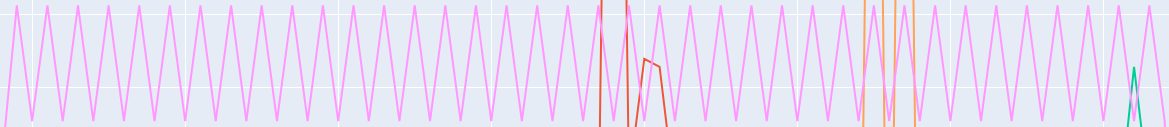

This is from YouTube putting the user / program into a recommendation loop. This is when a recommended video goes to the previous video you watched, which recommends that video again.

In [67]:
from plotly.subplots import make_subplots

rootVideos = os.listdir(f"api_data/maxDepth-1000")
madeforKids = [0,0] # madeForKids[0] -> amount true | madeForKids[1] -> amount false
selfDeclaredMadeforKids = [0,0] # selfDeclaredMadeforKids[0] -> amount true | selfDeclaredMadeforKids[1] -> amount false
for root in rootVideos:
    try:
        with open(f"api_data/maxDepth-1000/{root}/videos.json", "r") as f:
            videoData = json.load(f)
    except FileNotFoundError:
        ""
    for ID in videoData:
        if(videoData[ID]["items"][0]["status"]["madeForKids"]):
            madeforKids[0] += 1
        else:
            madeforKids[1] += 1
        if(videoData[ID]["items"][0]["status"]["selfDeclaredMadeForKids"]):
            selfDeclaredMadeforKids[0] += 1
        else:
            selfDeclaredMadeforKids[1] += 1

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=["Labeled For Kids", "Not Labeled For Kids"], values=madeforKids, name="Flagged for Kids"), 1, 1)
fig.add_trace(go.Pie(labels=["Labeled For Kids", "Not Labeled For Kids"], values=selfDeclaredMadeforKids, name="Self Declared for Kids"), 1, 2)

fig.update_layout(
    title="Pie Chart of Videos Labels for Kids",
    annotations=[dict(text='Youtube Flagged', x=0.15, y=-0.15, font_size=20, showarrow=False),
                 dict(text='Self Declared', x=0.83, y=-0.15, font_size=20, showarrow=False)]
)

fig.show()


In [68]:
# define function to return the category name that corresponds to a category ID
# List comes from https://mixedanalytics.com/blog/list-of-youtube-video-category-ids/
# published: December 31, 2022 by Ana
def getCategoryName(categoryID):
    if categoryID == 1:
        return "Film & Animation"
    elif categoryID == 2:
        return "Autos & Vehicles"
    elif categoryID == 10:
        return "Music"
    elif categoryID == 15:
        return "Pets & Animals"
    elif categoryID == 17:
        return "Sports"
    elif categoryID == 18:
        return "Short Movies"
    elif categoryID == 19:
        return "Travel & Events"
    elif categoryID == 20:
        return "Gaming"
    elif categoryID == 21:
        return "Videoblogging"
    elif categoryID == 22:
        return "People & Blogs"
    elif categoryID == 23:
        return "Comedy"
    elif categoryID == 24:
        return "Entertainment"
    elif categoryID == 25:
        return "News & Politics"
    elif categoryID == 26:
        return "Howto & Style"
    elif categoryID == 27:
        return "Education"
    elif categoryID == 28:
        return "Science & Technology"
    elif categoryID == 29:
        return "Nonprofits & Activism"
    elif categoryID == 30:
        return "Movies"
    elif categoryID == 31:
        return "Anime/Animation"
    elif categoryID == 32:
        return "Action/Adventure"
    elif categoryID == 33:
        return "Classics"
    elif categoryID == 34:
        return "Comedy"
    elif categoryID == 35:
        return "Documentary"
    elif categoryID == 36:
        return "Drama"
    elif categoryID == 37:
        return "Family"
    elif categoryID == 38:
        return "Foreign"
    elif categoryID == 39:
        return "Horror"
    elif categoryID == 40:
        return "Sci-Fi/Fantasy"
    elif categoryID == 41:
        return "Thriller"
    elif categoryID == 42:
        return "Shorts"
    elif categoryID == 43:
        return "Shows"
    elif categoryID == 44:
        return "Trailers"
    else:
        return "Unknown Category"

In [69]:
fig = go.Figure()
rootVideos = os.listdir(f"api_data/maxDepth-1000")
categoriesSeen = {}
categories = {}
for root in rootVideos:
    try:
        with open(f"api_data/maxDepth-1000/{root}/videos.json", "r") as f:
            videoData = json.load(f)
    except FileNotFoundError:
        ""
    for ID in videoData:
        category = getCategoryName((int)(videoData[ID]["items"][0]["snippet"]["categoryId"]))
        try:
            categoriesSeen[category] += videoData[ID]["seenCount"]
            if(videoData[ID]["items"][0]["statistics"]["viewCount"] != None): #apparently some videos can have no views available for some reason (Example: https://www.youtube.com/watch?v=nbir00y0_6Y)
                categories[category] += videoData[ID]["items"][0]["statistics"]["viewCount"]
        except KeyError:
            categoriesSeen[category] = videoData[ID]["seenCount"]
            if(videoData[ID]["items"][0]["statistics"]["viewCount"] == None): # if video views are null initialize as 0 instead
                categories[category] = 0
            else:
                categories[category] = videoData[ID]["items"][0]["statistics"]["viewCount"]

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=list(categoriesSeen.keys()), values=list(categoriesSeen.values()), name="Number of time Categories have been seen through traversal"), 1, 1)
fig.add_trace(go.Pie(labels=list(categories.keys()), values=list(categories.values()), name="Number of views each Category has"), 1, 2)

fig.update_layout(
    title="Pie Charts of Categories",
    annotations=[dict(text='Categories Seen', x=0.15, y=-0.15, font_size=20, showarrow=False),
                 dict(text='Category Views', x=0.83, y=-0.15, font_size=20, showarrow=False)]
)

fig.show()

In [70]:
fig = go.Figure()

categories = {}

rootVideos = os.listdir(f"api_data/maxDepth-1000")
for root in rootVideos:
    try:
        with open(f"api_data/maxDepth-1000/{root}/videos.json", "r") as f:
            videoData = json.load(f)
    except FileNotFoundError:
        ""
    for ID in videoData:
        category = getCategoryName((int)(videoData[ID]["items"][0]["snippet"]["categoryId"]))
        try:
            if(videoData[ID]["items"][0]["statistics"]["viewCount"] != None): #apparently some videos can have no views available for some reason (Example: https://www.youtube.com/watch?v=nbir00y0_6Y)
                categories[category].append(videoData[ID]["items"][0]["statistics"]["viewCount"])
        except KeyError:
            if(videoData[ID]["items"][0]["statistics"]["viewCount"] == None): # if video views are null initialize as 0 instead
                categories[category] = []
            else:
                categories[category] = [videoData[ID]["items"][0]["statistics"]["viewCount"]]

for category in categories:
    fig.add_trace(go.Box(y=categories[category],name=category))

fig.update_layout(
    title="Box Plots of views for each category",
    xaxis_title="Category ID",
    yaxis_title="Number of views",
    legend_title="Legend",
    yaxis_range=[0,10000000]
)

fig.show()

In [71]:
fig = go.Figure()


rootVideos = os.listdir(f"api_data/maxDepth-1000")

sameCategory = [0] * len(rootVideos)
differentCategory = [0] * len(rootVideos) 
index = 0

for root in rootVideos:
    try:
        with open(f"api_data/maxDepth-1000/{root}/videos.json", "r") as f:
            videoData = json.load(f)
    except FileNotFoundError:
        ""
    prevCategory = videoData[root]["items"][0]["snippet"]["categoryId"]
    for ID in videoData:
        if(videoData[ID]["items"][0]["snippet"]["categoryId"] != prevCategory):
            # Video is in a different category from the root
            differentCategory[index] += 1
        else:
            sameCategory[index] += 1
    index += 1
fig.add_trace(go.Bar(x=rootVideos, y=sameCategory,name="sameCategory"))
fig.add_trace(go.Bar(x=rootVideos, y=differentCategory, name="differentCategory"))

fig.update_layout(
    title="Deviation from initial root category",
    xaxis_title="Root ID",
    yaxis_title="Amount of visits",
    legend_title="Legend"
)

fig.show()

In [72]:
fig = go.Figure()

rootVideos = os.listdir(f"api_data/maxDepth-1000")

sameCategory = [0] * len(rootVideos)
differentCategory = [0] * len(rootVideos) 
index = 0

for root in rootVideos:
    try:
        with open(f"api_data/maxDepth-1000/{root}/videos.json", "r") as f:
            videoData = json.load(f)
    except FileNotFoundError:
        ""
    prevCategory = videoData[root]["items"][0]["snippet"]["categoryId"]  # get the root category and set is to previous category
    for ID in videoData:
        if(videoData[ID]["items"][0]["snippet"]["categoryId"] != prevCategory):
            # Video is in a different category from the previous one
            differentCategory[index] += 1
        else:
            sameCategory[index] += 1
        prevCategory = videoData[ID]["items"][0]["snippet"]["categoryId"] # set prevCategory to the current category
    index += 1
fig.add_trace(go.Bar(x=rootVideos, y=sameCategory,name="sameCategory"))
fig.add_trace(go.Bar(x=rootVideos, y=differentCategory, name="differentCategory"))

fig.update_layout(
    title="Times videos led to the same category vs a different category",
    xaxis_title="Root ID",
    yaxis_title="Amount of visits",
    legend_title="Legend"
)

fig.show()

### What is this?

This shows that while there is actually quite a lot of deviation from the root video, on average video to video you will encounter many of the same categories.

In [73]:
fig = go.Figure()


rootVideos = os.listdir(f"api_data/maxDepth-1000")
mostCommon = []
mostCommonNames = []
for root in rootVideos:
    try:
        with open(f"api_data/maxDepth-1000/{root}/videos.json", "r") as f:
            videoData = json.load(f)
    except FileNotFoundError:
        ""
    categories = {}
    for ID in videoData:
        category = getCategoryName((int)(videoData[ID]["items"][0]["snippet"]["categoryId"]))
        try:
            categories[category] += videoData[ID]["seenCount"]
        except KeyError:
            categories[category] = 0
    # find most common cateory
    max = 0
    categoryTitle = ''
    for category in categories:
        if(categories[category] > max):
            max = categories[category]
            categoryTitle = category
    mostCommon.append(max)        
    mostCommonNames.append(categoryTitle)        

fig.add_trace(go.Bar(x=mostCommonNames, y=mostCommon))

fig.update_layout(
    title="Most common categories of each root",
    xaxis_title="Category Name",
    yaxis_title="Number of visits"
    
)

fig.show()

In [74]:
rootVideos = os.listdir(f"api_data/maxDepth-1000")
totalUniqueVideos = 0
totalVideos = 0

for rootID in rootVideos:
    try:
        with open(f"api_data/maxDepth-1000/{rootID}/videos.json", "r") as f:
            videoData = json.load(f)
    except FileNotFoundError:
        continue
    totalUniqueVideos += len(videoData)
    for video in videoData:
        totalVideos += videoData[video]["seenCount"]

print(f"Total unique videos from {len(rootVideos)} roots: {totalUniqueVideos}")
print(f"Total videos from {len(rootVideos)} roots: {totalVideos}")

Total unique videos from 105 roots: 19617
Total videos from 105 roots: 105823
